Ex-8: Class Imbalance- SMOTE Technique

1. Download the Kaggle credit card dataset 
2. Check if the target class has imbalance and display it.
3. Apply any one classifier on the data.
4. Apply SMOTE technique on the dataset.
5. Implement the same classifier after SMOTE.
6. a) Compare the classification accuracy and b) show the results using visualization using PCA and 2D Scatter plot

In [56]:
import pandas as pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix


In [57]:
data = pandas.read_csv(r'C:\Users\admin\Desktop\sem-5\AdvancedML\creditcard.csv')
X = data.drop('Class', axis=1)
y = data['Class']

In [58]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


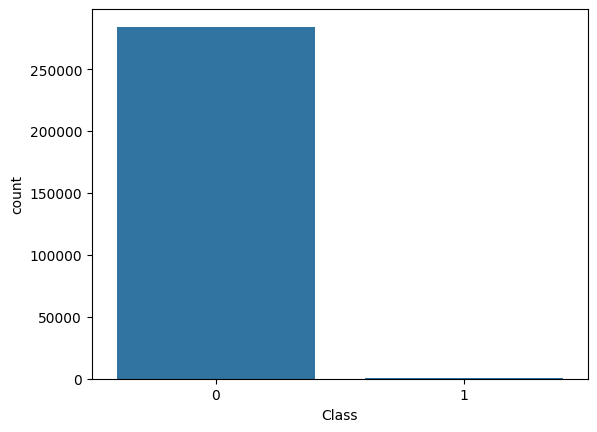

In [59]:
sns.countplot(x=y)
plt.title("")
plt.show()

In [60]:
print( y.value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model =DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [62]:
test_preds = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)
print("Train Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", test_accuracy)

Train Accuracy: 1.0
Test Accuracy: 0.9990519995786665


In [63]:
print(classification_report(y_test, test_preds))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.80      0.74        98

    accuracy                           1.00     56962
   macro avg       0.85      0.90      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [64]:
print("\n",confusion_matrix(y_test, test_preds))


 [[56830    34]
 [   20    78]]


In [70]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
print("After SMOTE, class distribution:")
print(y_smote.value_counts())

After SMOTE, class distribution:
Class
0    284315
1    284315
Name: count, dtype: int64


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [72]:
test_preds = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)
print("Train Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", test_accuracy)

Train Accuracy: 1.0
Test Accuracy: 0.9986282820111496


In [73]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [74]:
print("\n",confusion_matrix(y_test, test_preds))


 [[56621   129]
 [   27 56949]]


After SMOTE, class distribution:
Class
0    284315
1    284315
Name: count, dtype: int64


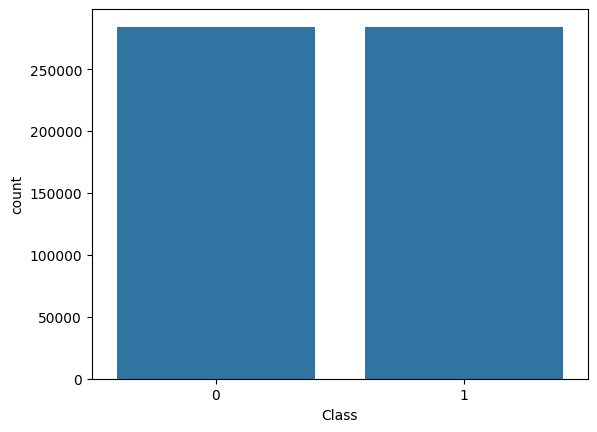

In [78]:
print("After SMOTE, class distribution:")
print(y_smote.value_counts())
sns.countplot(x=y_smote)
plt.title("")
plt.show()

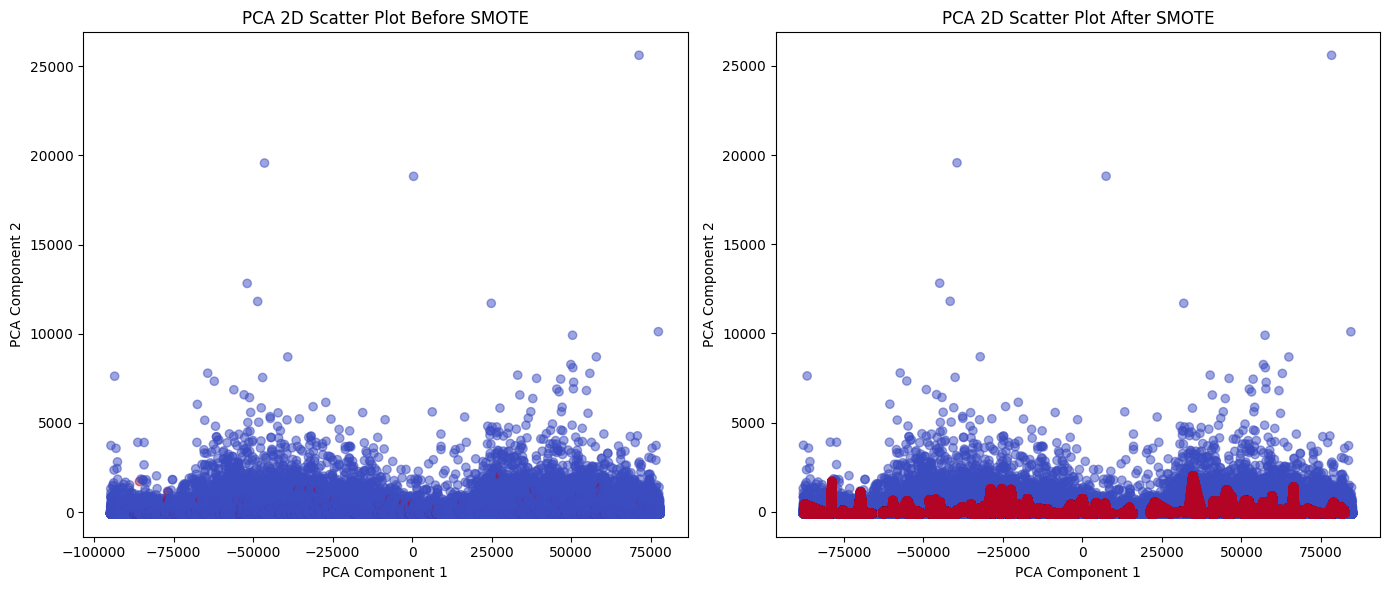

In [89]:
plt.figure(figsize=(14, 6))

# Before SMOTE
plt.subplot(1, 2, 1)
plt.scatter(X_pca_before[:, 0], X_pca_before[:, 1], c=y, cmap='coolwarm', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA 2D Scatter Plot Before SMOTE')

# After SMOTE
plt.subplot(1, 2, 2)
plt.scatter(X_pca_after[:, 0], X_pca_after[:, 1], c=y_smote, cmap='coolwarm', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA 2D Scatter Plot After SMOTE')

plt.tight_layout()
plt.show()